In [1]:
import numpy as np
import pandas as pd
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\mural\anaconda3\lib\site-packages (0.11.2)


In [31]:
df=pd.read_csv("C:/Users/mural/Desktop/New folder/train.csv")

In [3]:
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# undersampling technique

In [4]:
# Class count
count_class_0, count_class_1 = df.Response.value_counts()

# Divide by class
df_class_0 = df[df['Response'] == 0]
df_class_1 = df[df['Response'] == 1]

In [5]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Response.value_counts())

Random under-sampling:
0    46710
1    46710
Name: Response, dtype: int64


In [6]:
df_test_under

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
288332,288333,Female,40,1,6.0,1,1-2 Year,No,2630.0,157.0,174,0
303884,303885,Male,23,1,46.0,1,< 1 Year,No,35000.0,152.0,27,0
130616,130617,Male,44,1,28.0,0,1-2 Year,Yes,34493.0,124.0,212,0
366416,366417,Male,80,1,28.0,0,1-2 Year,Yes,28945.0,26.0,195,0
359604,359605,Female,22,1,8.0,1,< 1 Year,No,36585.0,152.0,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381057,381058,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1
381061,381062,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1
381073,381074,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1
381075,381076,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1


# convert categ to num

# Vehicle age

In [7]:
from sklearn.preprocessing import OneHotEncoder 

In [8]:
Vehicle_Age = pd.get_dummies(df_test_under['Vehicle_Age'])
Vehicle_Age

,1-2 Year,< 1 Year,> 2 Years
288332,1,0,0
303884,0,1,0
130616,1,0,0
366416,1,0,0
359604,0,1,0
...,...,...,...
381057,1,0,0
381061,1,0,0
381073,1,0,0
381075,1,0,0


# Vehicle_Damage

In [9]:
Vehicle_Damage = pd.get_dummies(df_test_under['Vehicle_Damage'])

Vehicle_Damage

,No,Yes
288332,1,0
303884,1,0
130616,0,1
366416,0,1
359604,1,0
...,...,...
381057,0,1
381061,0,1
381073,0,1
381075,0,1


# Gender

In [10]:
Gender = pd.get_dummies(df_test_under['Gender'])


Gender

,Female,Male
288332,1,0
303884,0,1
130616,0,1
366416,0,1
359604,1,0
...,...,...
381057,0,1
381061,1,0
381073,1,0
381075,1,0


# drop coloumns which are converted into ohe form from main df¶


In [11]:
df_test_under.drop(['Vehicle_Damage', 'Vehicle_Age','Gender','id'], axis='columns', inplace=True)

# concatenation

In [12]:
x=pd.concat([df_test_under, Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x.drop(['Response'], axis='columns', inplace=True)
x

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
288332,40,1,6.0,1,2630.0,157.0,174,1,0,0,1,0,1,0
303884,23,1,46.0,1,35000.0,152.0,27,0,1,0,1,0,0,1
130616,44,1,28.0,0,34493.0,124.0,212,1,0,0,0,1,0,1
366416,80,1,28.0,0,28945.0,26.0,195,1,0,0,0,1,0,1
359604,22,1,8.0,1,36585.0,152.0,97,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381057,40,1,46.0,0,27508.0,26.0,189,1,0,0,0,1,0,1
381061,41,1,28.0,0,37377.0,124.0,99,1,0,0,0,1,1,0
381073,46,1,28.0,0,34741.0,124.0,167,1,0,0,0,1,1,0
381075,61,1,28.0,0,43875.0,26.0,139,1,0,0,0,1,1,0


In [13]:
y=df_test_under.Response


# train test split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)


<IPython.core.display.Javascript object>

(74736, 14)
(18684, 14)


# logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\mural\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6235281524298866

# roc auc

In [16]:
from sklearn.metrics import roc_curve,roc_auc_score,auc


y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('logistic reg ROC curve: vehicle insurance')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

Area under curve (AUC):  0.6500214825571319


# oversampling technique

In [17]:
# Class count
count_class_0, count_class_1 = df.Response.value_counts()

# Divide by class
df_class_0 = df[df['Response'] == 0]
df_class_1 = df[df['Response'] == 1]

In [18]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Response.value_counts())



Random over-sampling:
0    334399
1    334399
Name: Response, dtype: int64


# convert categ to num¶

In [19]:
Gender = pd.get_dummies(df_test_over['Gender'])
Vehicle_Damage = pd.get_dummies(df_test_over['Vehicle_Damage'])
Vehicle_Age = pd.get_dummies(df_test_over['Vehicle_Age'])

# drop coloumns which are converted into ohe form from main df¶

In [20]:
df_test_over.drop(['Vehicle_Damage', 'Vehicle_Age','Gender','id'], axis='columns', inplace=True)

In [21]:
df_test_over

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,76,1,3.0,0,33536.0,26.0,183,0
3,21,1,11.0,1,28619.0,152.0,203,0
4,29,1,41.0,1,27496.0,152.0,39,0
5,24,1,33.0,0,2630.0,160.0,176,0
6,23,1,11.0,0,23367.0,152.0,249,0
...,...,...,...,...,...,...,...,...
235299,49,1,28.0,0,27038.0,91.0,48,1
295044,47,1,46.0,0,28093.0,156.0,77,1
142144,31,1,13.0,0,2630.0,156.0,245,1
360866,30,1,7.0,0,25789.0,163.0,31,1


# concatenation

In [22]:
x1=pd.concat([df_test_over, Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x1.drop(['Response'], axis='columns', inplace=True)


In [23]:
y1=df_test_over.Response


# train test split

In [24]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=0)
print(X_train1.shape)
print(X_test1.shape)

<IPython.core.display.Javascript object>

(535038, 14)
(133760, 14)


# logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train1)
model.score(X_test1,y_test1)

C:\Users\mural\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7404231459330144

# roc auc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

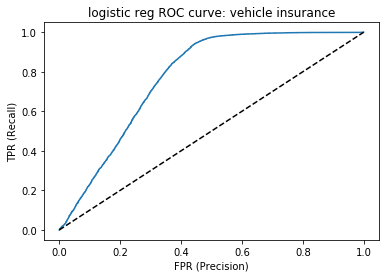

Area under curve (AUC):  0.7743031088832479


In [26]:
from sklearn.metrics import roc_curve,roc_auc_score,auc


y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('logistic reg ROC curve: vehicle insurance')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# smote technique

# convert categ to num¶

In [32]:
Gender = pd.get_dummies(df['Gender'])
Vehicle_Damage = pd.get_dummies(df['Vehicle_Damage'])
Vehicle_Age = pd.get_dummies(df['Vehicle_Age'])

# drop coloumns which are converted into ohe form from main df

In [33]:
df.drop(['Vehicle_Damage', 'Vehicle_Age','Gender','id'], axis='columns', inplace=True)

In [34]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,40454.0,26.0,217,1
1,76,1,3.0,0,33536.0,26.0,183,0
2,47,1,28.0,0,38294.0,26.0,27,1
3,21,1,11.0,1,28619.0,152.0,203,0
4,29,1,41.0,1,27496.0,152.0,39,0


# concatenation

In [35]:
x3=pd.concat([df, Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x3.drop(['Response'], axis='columns', inplace=True)
y3=df['Response']

In [36]:
x3

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
0,44,1,28.0,0,40454.0,26.0,217,0,0,1,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,1,0,0,1,0,0,1
2,47,1,28.0,0,38294.0,26.0,27,0,0,1,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0,0,1
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,1,0,0,1,0,0,1
381105,30,1,37.0,1,40016.0,152.0,131,0,1,0,1,0,0,1
381106,21,1,30.0,1,35118.0,160.0,161,0,1,0,1,0,0,1
381107,68,1,14.0,0,44617.0,124.0,74,0,0,1,0,1,1,0


In [37]:
!pip install imblearn

In [38]:
pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/b1/bd/4bb46fb4d317fd0f19aa7463d8906598e5fee073c0842b57cb112f023a45/imbalanced_learn-0.8.1-py3-none-any.whl
  Found existing installation: imbalanced-learn 0.5.0
    Uninstalling imbalanced-learn-0.5.0:
      Successfully uninstalled imbalanced-learn-0.5.0
Note: you may need to restart the kernel to use updated packages.


In [43]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x3, y3)

y_sm.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

# train test split

In [44]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)
print(X_train1.shape)
print(X_test1.shape)

<IPython.core.display.Javascript object>

(535038, 14)
(133760, 14)


# logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train1)
model.score(X_test1,y_test1)

C:\Users\mural\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8073863636363636

# roc auc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

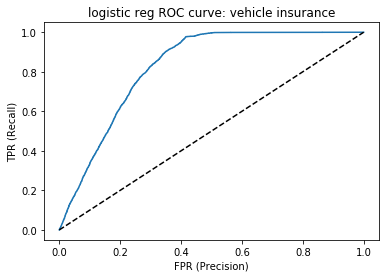

Area under curve (AUC):  0.8254504676516922


In [46]:
from sklearn.metrics import roc_curve,roc_auc_score,auc


y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('logistic reg ROC curve: vehicle insurance')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))